<a href="https://colab.research.google.com/github/AnnyshkaF/High-Performance-Lab/blob/main/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install mpi4py

In [ ]:
%%writefile test.py
#try to parralell
from mpi4py import MPI
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from random import random
#import os 
#os.environ["OMP_NUM_THREADS"] = "1"

def map_fun(r, x):
    return r*x*(1-x)

x_i = random()  #initial value of x
n = 200  #number of iterations
last = 200  #number of last values that we take into account
number_r = 100

comm = MPI.COMM_WORLD #create a communicator
rank = comm.Get_rank() #rank of executing process
size = comm.Get_size() #gives number of ranks in comm
print("my rank is ", rank)

t1 = MPI.Wtime()
r_values = np.linspace(0, 4, number_r)
r_list = np.array_split(r_values,size)[rank]
numDataPerRank = int((r_values.size)/size)


#sendbuf = np.array([])
sendbuf = []
R = []
x_n = []
#for r in r_values[rank*numDataPerRank: (rank+1)*numDataPerRank]:
for r in r_list:
    x_i = random()
    for i in range(n+last):
        x_i = map_fun(r, x_i)
        if i >= n:
            x_n.append(x_i)
            R.append(r)


sendbuf = x_n
  
t2 = MPI.Wtime()        
#comm.Gather(sendbuf, recvbuf, root=0)
recieved_x = comm.gather(sendbuf,root=0) 
recieved_r = comm.gather(R,root=0) 

if rank == 0:
    recv_x = np.hstack(recieved_x) 
    recv_r = np.hstack(recieved_r)
    #print('Rank: ',rank, ', recvbuf received: ',recvbuf, ', size', len(recvbuf))
    #fig = plt.figure()
    #plt.plot(recv_r, recv_x, ls='',marker=',')
    #plt.show()
    #fig.savefig('Bifurcation map with n = {} processes'.format(size))

Writing test.py


In [ ]:
! mpirun --allow-run-as-root -n 1 python test.py

my rank is  0


In [ ]:
timeit_arr = []
for i in range(1, 8):
#     timeit_value = %timeit -o -n 10 ! mpiexec mpirun -n {i} python bifurcation_v2.py
    timeit_value = %timeit -o -n 1 ! mpirun --allow-run-as-root -n {i} python test.py
#    timeit_arr.append(sum(timeit_value.all_runs)/len(timeit_value.all_runs))
    timeit_arr.append(sum(timeit_value.all_runs)/len(timeit_value.all_runs))
    print(i)

In [ ]:
timeit_value = %timeit -o -n 1 ! mpirun --allow-run-as-root -n 1 python test.py

Text(0.5, 0.98, 'Speedup vs Np')

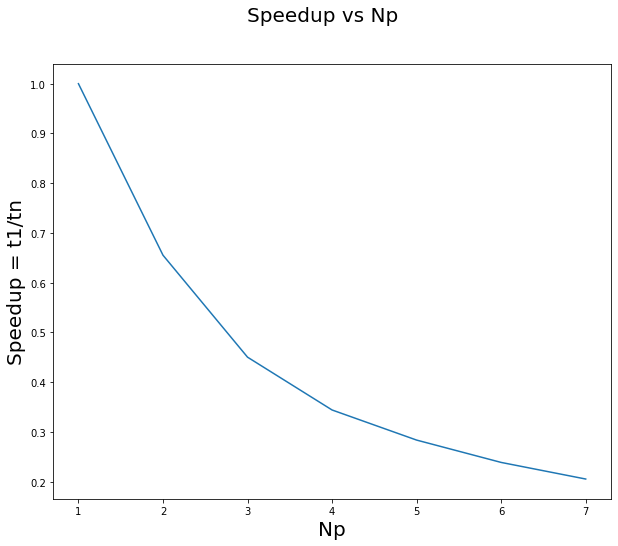

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

t1 = timeit_arr[0]
def SpeedUp(tn):
    return t1/tn
Speedup = list(map(SpeedUp, timeit_arr))
plt.figure(figsize=(10, 8))
num_of_processes = np.linspace(1, len(timeit_arr), len(timeit_arr))
plt.plot(num_of_processes, Speedup)
plt.xlabel('Np', fontsize = 20)
plt.ylabel('Speedup = t1/tn', fontsize = 20)
plt.suptitle('Speedup vs Np', fontsize = 20)


In [2]:
#%%writefile test.py

# Bifurcation map

from mpi4py import MPI
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from random import random
import time
#import os 
#os.environ["OMP_NUM_THREADS"] = "1"

def map_fun(r, x):
    return r*x*(1-x)

x_i = random()  #initial value of x
n = 200  #number of iterations
last = 200  #number of last values that we take into account
number_r = 10000

comm = MPI.COMM_WORLD #create a communicator
rank = comm.Get_rank() #rank of executing process
size = comm.Get_size() #gives number of ranks in comm
print("my rank is ", rank)

t1 = MPI.Wtime()
r_values = np.linspace(0, 4, number_r)
r_list = np.array_split(r_values,size)[rank]
numDataPerRank = int((r_values.size)/size)

if(rank == 0):
    start = time.time()

#sendbuf = np.array([])
sendbuf = []
R = []
x_n = []
#for r in r_values[rank*numDataPerRank: (rank+1)*numDataPerRank]:
for r in r_list:
    x_i = random()
    for i in range(n+last):
        x_i = map_fun(r, x_i)
        if i >= n:
            x_n.append(x_i)
            R.append(r)


sendbuf = x_n
  
t2 = MPI.Wtime()        
#comm.Gather(sendbuf, recvbuf, root=0)
recieved_x = comm.gather(sendbuf,root=0) 
recieved_r = comm.gather(R,root=0) 

if rank == 0:
    recv_x = np.hstack(recieved_x) 
    recv_r = np.hstack(recieved_r)
    print('Time: {:.3f}s'.format(time.time() - start))
    #print('Rank: ',rank, ', recvbuf received: ',recvbuf, ', size', len(recvbuf))
    #fig = plt.figure()
    #plt.plot(recv_r, recv_x, ls='',marker=',')
    #plt.show()
    #fig.savefig('Bifurcation map with n = {} processes'.format(size))

my rank is  0
Time: 17.808s


In [1]:
! mpirun --allow-run-as-root -n 1 python test.py

tcmalloc: large alloc 1600004096 bytes == 0x55d289266000 @  0x7fd8b4667001 0x7fd8b222554f 0x7fd8b2275b58 0x7fd8b2279b17 0x7fd8b2318203 0x55d2867e5544 0x55d2867e5240 0x55d286859627 0x55d2868539ee 0x55d2868536f3 0x55d28691d4c2 0x55d28691d83d 0x55d28691d6e6 0x55d2868f5163 0x55d2868f4e0c 0x7fd8b344fbf7 0x55d2868f4cea
tcmalloc: large alloc 1600004096 bytes == 0x55d2e8fea000 @  0x7fd8b46651e7 0x7fd8b222546e 0x7fd8b2275c7b 0x7fd8b227635f 0x7fd8b2318103 0x55d2867e5544 0x55d2867e5240 0x55d286859627 0x55d2868539ee 0x55d2868536f3 0x55d28691d4c2 0x55d28691d83d 0x55d28691d6e6 0x55d2868f5163 0x55d2868f4e0c 0x7fd8b344fbf7 0x55d2868f4cea
tcmalloc: large alloc 1600004096 bytes == 0x55d3485cc000 @  0x7fd8b46651e7 0x7fd8b222546e 0x7fd8b2275c7b 0x7fd8b2275d97 0x7fd8b226f4a5 0x7fd8b234029c 0x7fd8b230ddd1 0x55d2867e54b0 0x55d2868d6e1d 0x55d286858e99 0x55d2868539ee 0x55d2868536f3 0x55d28691d4c2 0x55d28691d83d 0x55d28691d6e6 0x55d2868f5163 0x55d2868f4e0c 0x7fd8b344fbf7 0x55d2868f4cea
Time: 78.515s


In [3]:
! mpirun --allow-run-as-root -n 2 python test.py

tcmalloc: large alloc 1600004096 bytes == 0x558fbf8d6000 @  0x7f9c0cee6001 0x7f9c0aaa454f 0x7f9c0aaf4b58 0x7f9c0aaf8b17 0x7f9c0ab97203 0x558fbbfa6544 0x558fbbfa6240 0x558fbc01a627 0x558fbc0149ee 0x558fbc0146f3 0x558fbc0de4c2 0x558fbc0de83d 0x558fbc0de6e6 0x558fbc0b6163 0x558fbc0b5e0c 0x7f9c0bccebf7 0x558fbc0b5cea
Time: 41.098s


In [6]:
! mpirun --allow-run-as-root -n 3 python test.py

tcmalloc: large alloc 1600004096 bytes == 0x55fd69b06000 @  0x7f633ee71001 0x7f633ca2f54f 0x7f633ca7fb58 0x7f633ca83b17 0x7f633cb22203 0x55fd65e71544 0x55fd65e71240 0x55fd65ee5627 0x55fd65edf9ee 0x55fd65edf6f3 0x55fd65fa94c2 0x55fd65fa983d 0x55fd65fa96e6 0x55fd65f81163 0x55fd65f80e0c 0x7f633dc59bf7 0x55fd65f80cea
Time: 43.004s


In [ ]:
timeit_arr = []
for i in range(1, 8):
#     timeit_value = %timeit -o -n 10 ! mpiexec mpirun -n {i} python bifurcation_v2.py
    timeit_value = %timeit -o -n 1 ! mpirun --allow-run-as-root -n {i} python test.py
#    timeit_arr.append(sum(timeit_value.all_runs)/len(timeit_value.all_runs))
    timeit_arr.append(sum(timeit_value.all_runs)/len(timeit_value.all_runs))
    print(i)

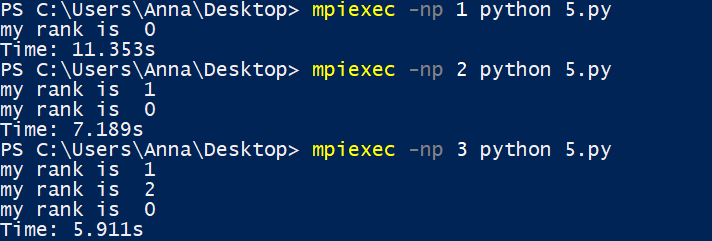